In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os

# Load data
base_path = "/home/tvanhout/oxides_ML/models"
directory = "test_training/test"

df_training     = pd.read_csv(os.path.join(base_path, directory , "training.csv"))
df_train_set    = pd.read_csv(os.path.join(base_path, directory , "train_set.csv")) 
df_test_set     = pd.read_csv(os.path.join(base_path, directory , "test_set.csv"))
df_val_set      = pd.read_csv(os.path.join(base_path, directory , "validation_set.csv"))
df_uq           = pd.read_csv(os.path.join(base_path, directory , "uq.csv"))

## Performance metrics

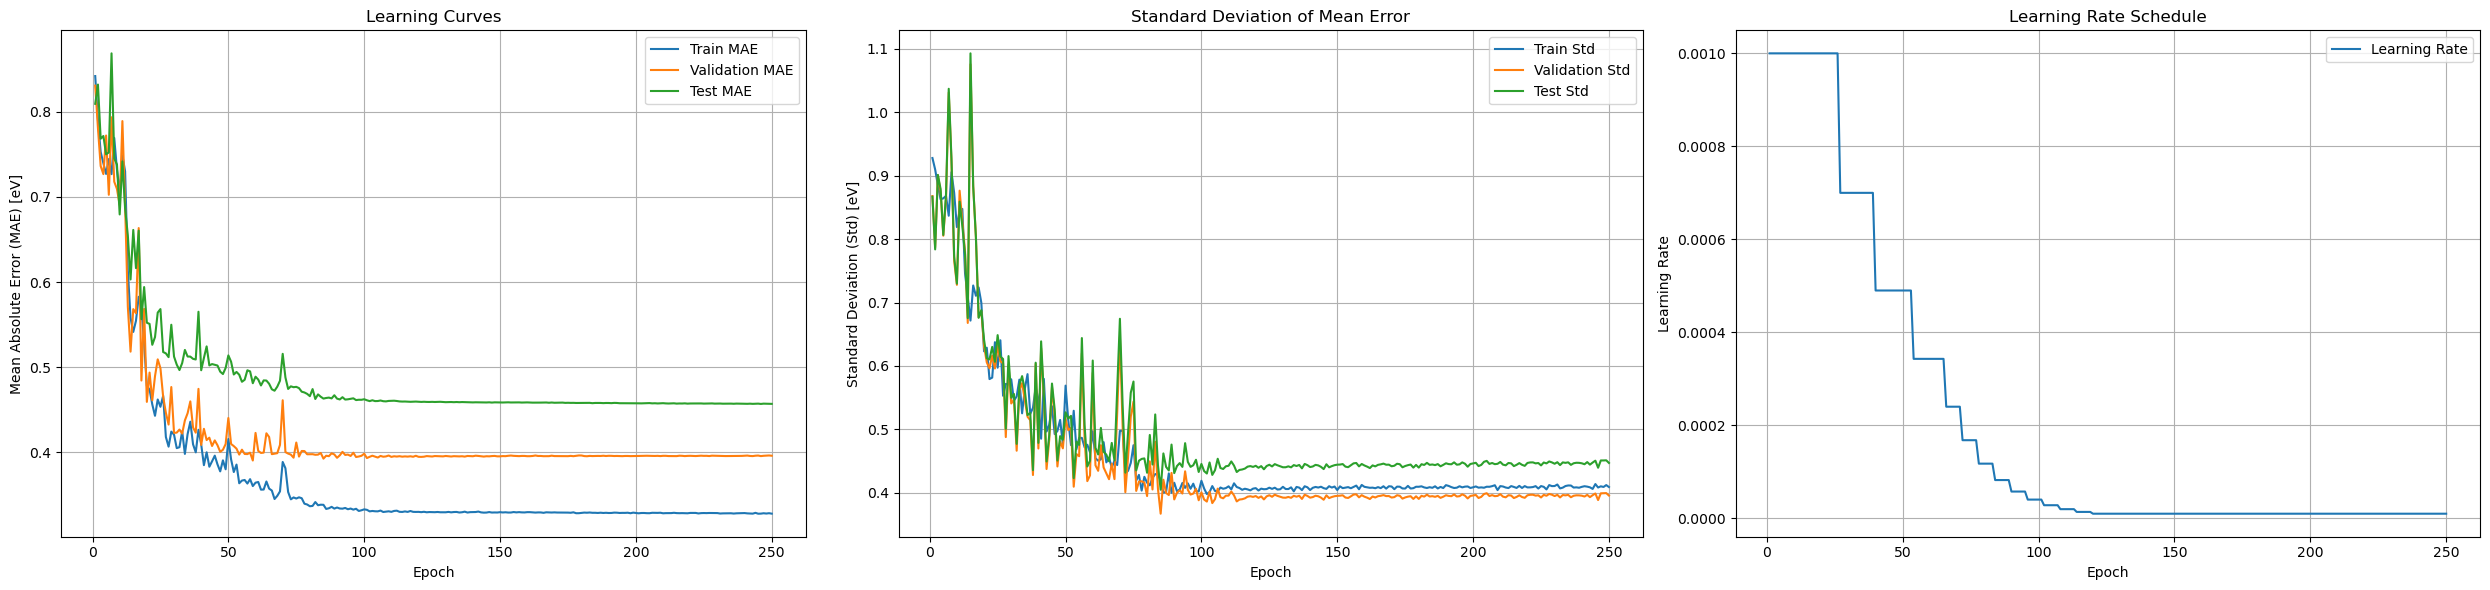

In [28]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6))

# Learning Curves (Train, Val, Test MAE)
axs[0].plot(df_training['Epoch'], df_training['Train_MAE_eV'], label='Train MAE')
axs[0].plot(df_training['Epoch'], df_training['Val_MAE_eV'], label='Validation MAE')
axs[0].plot(df_training['Epoch'], df_training['Test_MAE_eV'], label='Test MAE')

axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Mean Absolute Error (MAE) [eV]')
axs[0].set_title('Learning Curves')
axs[0].legend()
axs[0].grid(True)

# Standard Deviation of Predictions (Train, Val, Test Std)
axs[1].plot(df_training['Epoch'], df_training['Train_std_eV'], label='Train Std')
axs[1].plot(df_training['Epoch'], df_training['Val_std_eV'], label='Validation Std')
axs[1].plot(df_training['Epoch'], df_training['Test_std_eV'], label='Test Std')

axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Standard Deviation (Std) [eV]')
axs[1].set_title('Standard Deviation of Mean Error')
axs[1].legend()
axs[1].grid(True)

# Learning Rate Schedule
axs[2].plot(df_training['Epoch'], df_training['Learning_Rate'], label='Learning Rate')

axs[2].set_xlabel('Epoch')
axs[2].set_ylabel('Learning Rate')
axs[2].set_title('Learning Rate Schedule')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()


##  Evaluation of the test set

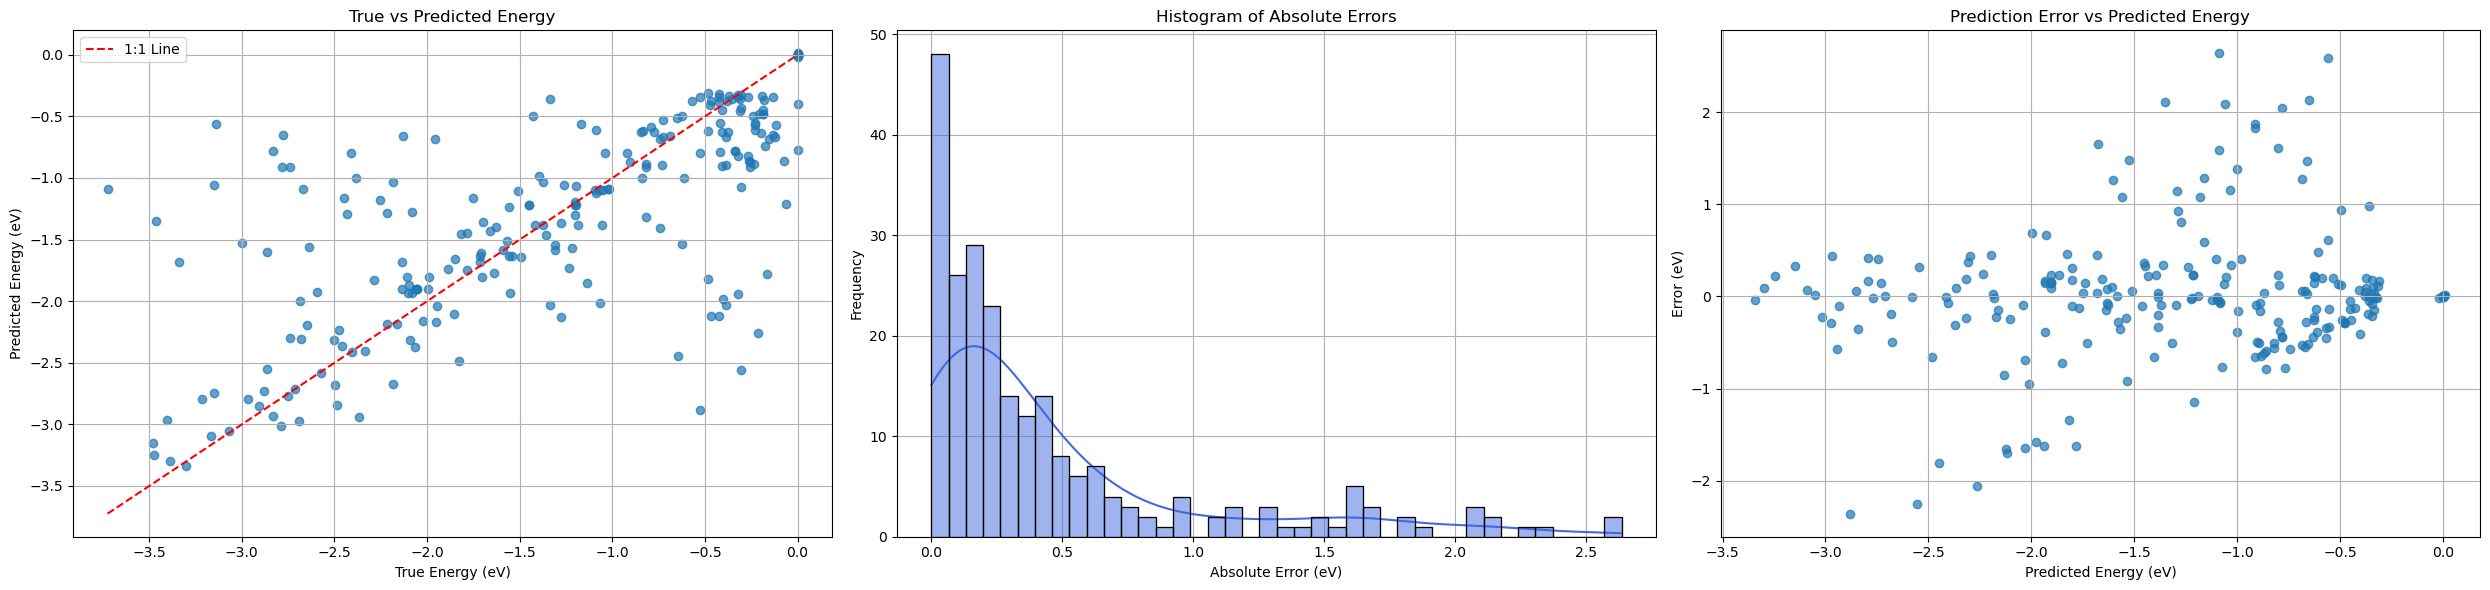

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(25, 6))  

# True vs. Predicted Energy Plot
axes[0].scatter(df_test_set['True_eV'], df_test_set['Prediction_eV'], alpha=0.7)
axes[0].plot([min(df_test_set['True_eV']), max(df_test_set['True_eV'])], 
             [min(df_test_set['True_eV']), max(df_test_set['True_eV'])], 
             'r--', label='1:1 Line')
axes[0].set_xlabel('True Energy (eV)')
axes[0].set_ylabel('Predicted Energy (eV)')
axes[0].set_title('True vs Predicted Energy')
axes[0].legend()
axes[0].grid(True)

# Histogram of Absolute Errors
sns.histplot(df_test_set['Abs_error_eV'], bins=40, kde=True, color='royalblue', ax=axes[1], zorder = 10)
axes[1].set_xlabel('Absolute Error (eV)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of Absolute Errors')
axes[1].grid(True)

# Prediction Error vs. Predicted Energy
axes[2].scatter(df_test_set['Prediction_eV'], df_test_set['Error_eV'], alpha=0.7)
axes[2].set_xlabel('Predicted Energy (eV)')
axes[2].set_ylabel('Error (eV)')
axes[2].set_title('Prediction Error vs Predicted Energy')
axes[2].grid(True)

plt.tight_layout()
plt.show()


## Uncertainty quantification

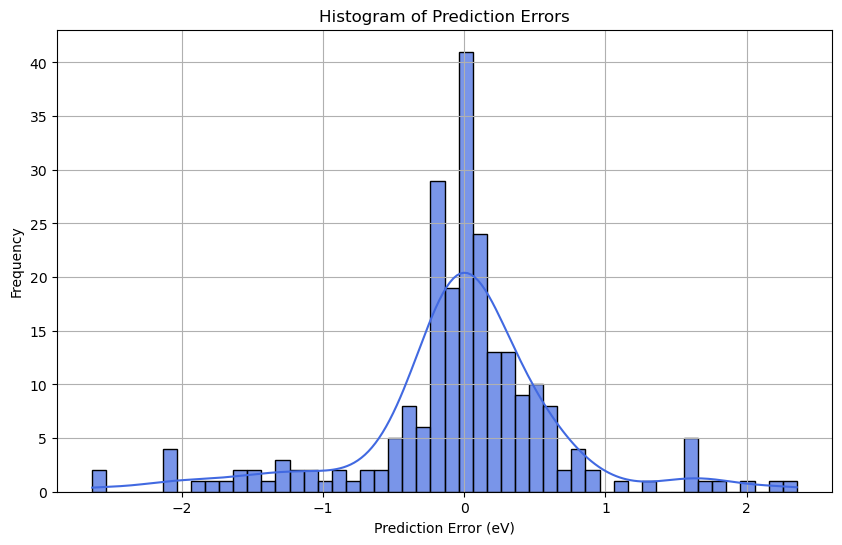

In [30]:
plt.figure(figsize=(10,6))
sns.histplot(df_uq['error'], bins=50, kde = True, color='royalblue', alpha=0.7)

plt.xlabel('Prediction Error (eV)')
plt.ylabel('Frequency')
plt.title('Histogram of Prediction Errors')
plt.grid(True)
plt.show()


## Evaluation of test set per Molecule Group

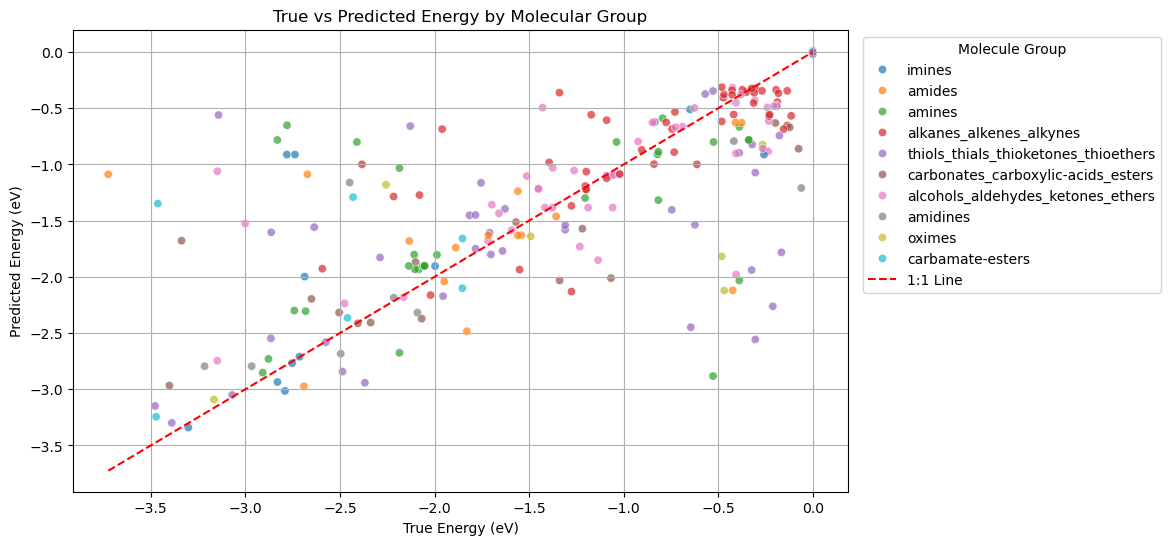

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_test_set, x='True_eV', y='Prediction_eV', hue='Molecule Group', alpha=0.7)
plt.plot([df_test_set['True_eV'].min(), df_test_set['True_eV'].max()], 
         [df_test_set['True_eV'].min(), df_test_set['True_eV'].max()], 
         'r--', label='1:1 Line')

plt.xlabel('True Energy (eV)')
plt.ylabel('Predicted Energy (eV)')
plt.title('True vs Predicted Energy by Molecular Group')
plt.legend(title="Molecule Group", bbox_to_anchor=(1.01, 1), loc='upper left')
plt.grid(True)

plt.show()


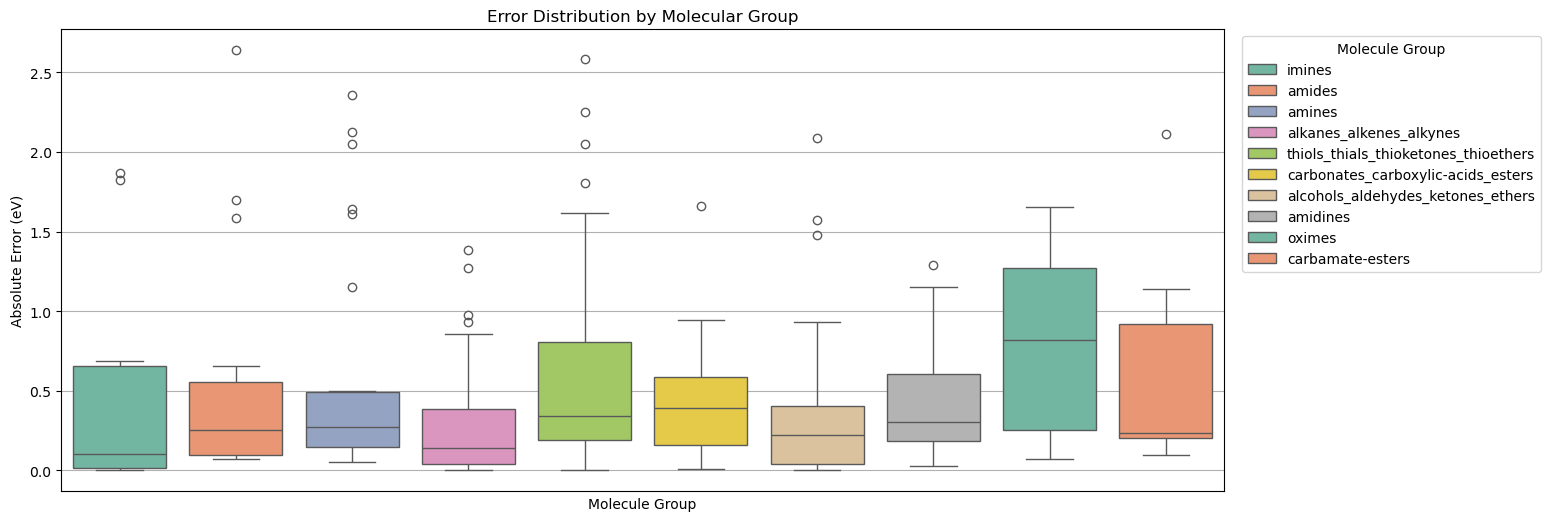

In [32]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_test_set, x='Molecule Group', y='Abs_error_eV', hue='Molecule Group', palette="Set2",legend=True)

plt.xlabel('Molecule Group')
plt.ylabel('Absolute Error (eV)')
plt.title('Error Distribution by Molecular Group')
#plt.xticks(rotation=45)
plt.xticks([])
plt.legend(title="Molecule Group", bbox_to_anchor=(1.01, 1), loc='upper left')
plt.grid(True)
plt.show()


## Uncertainty Qualification per Molecule Group

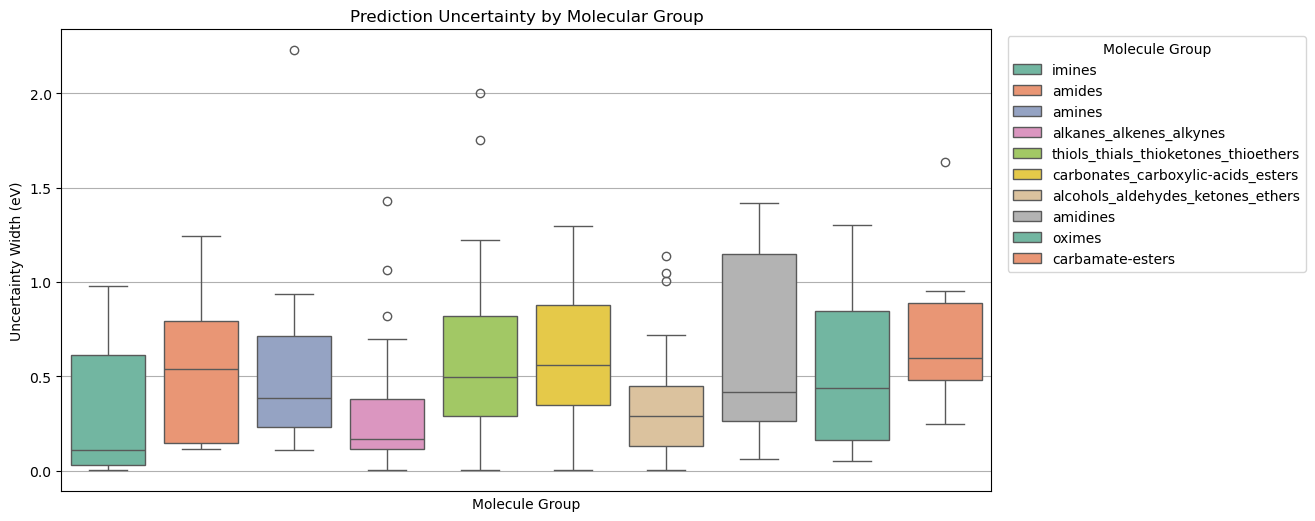

In [33]:
df_uq['uncertainty_width'] = df_uq['y_std']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_uq, x='molecule_group', y='uncertainty_width', hue='molecule_group', palette="Set2", legend=True)

plt.xlabel('Molecule Group')
plt.ylabel('Uncertainty Width (eV)')
plt.title('Prediction Uncertainty by Molecular Group')
#plt.xticks(rotation=45)
plt.xticks([])
plt.legend(title="Molecule Group", bbox_to_anchor=(1.01, 1), loc='upper left')
plt.grid(True)
plt.show()


In [34]:
df_uq.sort_values(["y_true"], ascending=True).head(15)

,formula,material,surface,molecule_group,molecule,y_true,y_mean,error,y_std,y_min,y_max,in_interval,norm_res,uncertainty_width
135,C2H5Ir40NO81,IrO2,110.0,amides,Acetamide,-3.725091,-1.088227,-2.636864,1.245450,-3.529309,1.352855,False,-2.117198,1.245450
109,C3H8Ir40O80S,IrO2,110.0,thiols_thials_thioketones_thioethers,Propane-2-thiol,-3.477344,-3.148392,-0.328952,0.832462,-4.780017,-1.516766,True,-0.395156,0.832462
158,CH3Ir40NO82,IrO2,110.0,carbamate-esters,Carbamic-acid,-3.471884,-3.245332,-0.226552,0.953773,-5.114728,-1.375936,True,-0.237532,0.953773
180,CH3Ir40NO82,IrO2,110.0,carbamate-esters,Carbamic-acid,-3.462773,-1.348830,-2.113943,1.633983,-4.551436,1.853776,True,-1.293737,1.633983
33,C2H4Ir40O82,IrO2,110.0,carbonates_carboxylic-acids_esters,Acetic-acid,-3.402022,-2.967570,-0.434453,0.071492,-3.107694,-2.827446,False,-6.076949,0.071492
168,C2H6Ir40O80S,IrO2,110.0,thiols_thials_thioketones_thioethers,Ethanethiol,-3.389266,-3.299738,-0.089527,0.149038,-3.591852,-3.007624,True,-0.600702,0.149038
9,CH2Ir40O82,IrO2,110.0,carbonates_carboxylic-acids_esters,Formic-acid,-3.337725,-1.678654,-1.659072,1.298303,-4.223328,0.866021,True,-1.277877,1.298303
198,C2H5Ir40NO80,IrO2,110.0,imines,N-methylmethanimine,-3.301773,-3.340646,0.038873,0.238957,-3.809002,-2.872291,True,0.162678,0.238957
21,CH4Ir40N2O80,IrO2,110.0,amidines,Formimidamide,-3.215866,-2.794995,-0.420871,0.325779,-3.433521,-2.156469,True,-1.291893,0.325779
118,CH3Ir40NO81,IrO2,110.0,oximes,Formaldoxime,-3.166023,-3.091114,-0.074909,0.096269,-3.279801,-2.902427,True,-0.778123,0.096269


In [35]:
df_uq.sort_values(["y_std"], ascending=False).head(20)

,formula,material,surface,molecule_group,molecule,y_true,y_mean,error,y_std,y_min,y_max,in_interval,norm_res,uncertainty_width
80,C3H9Ir40NO80,IrO2,110.0,amines,Trimethylamine,-0.816608,-1.317827,0.501219,2.227132,-5.683006,3.047351,True,0.225051,2.227132
73,C3H8Ir40O80S,IrO2,110.0,thiols_thials_thioketones_thioethers,Propane-2-thiol,-0.211618,-2.262344,2.050726,2.001903,-6.186074,1.661386,True,1.024388,2.001903
230,C2H4Ir40O80S,IrO2,110.0,thiols_thials_thioketones_thioethers,Ethanethial,-2.863630,-1.603872,-1.259758,1.752222,-5.038226,1.830483,True,-0.718949,1.752222
180,CH3Ir40NO82,IrO2,110.0,carbamate-esters,Carbamic-acid,-3.462773,-1.348830,-2.113943,1.633983,-4.551436,1.853776,True,-1.293737,1.633983
110,C2H4Ir40O80,IrO2,110.0,alkanes_alkenes_alkynes,Ethene,-1.197696,-1.063932,-0.133764,1.427702,-3.862227,1.734364,True,-0.093692,1.427702
162,C2H6Ir40N2O80,IrO2,110.0,amidines,Acetimidamide,-0.060982,-1.210196,1.149213,1.416292,-3.986129,1.565738,True,0.811424,1.416292
45,CH3Ir40NO81,IrO2,110.0,oximes,Formaldoxime,-1.491208,-1.639828,0.148619,1.304358,-4.196369,0.916713,True,0.113941,1.304358
9,CH2Ir40O82,IrO2,110.0,carbonates_carboxylic-acids_esters,Formic-acid,-3.337725,-1.678654,-1.659072,1.298303,-4.223328,0.866021,True,-1.277877,1.298303
63,C2H5Ir40NO81,IrO2,110.0,amides,Acetamide,-2.671964,-1.088227,-1.583737,1.245450,-3.529309,1.352855,True,-1.271618,1.245450
135,C2H5Ir40NO81,IrO2,110.0,amides,Acetamide,-3.725091,-1.088227,-2.636864,1.245450,-3.529309,1.352855,False,-2.117198,1.245450


In [36]:
df_uq.sort_values(["error"], ascending=True).head(15)

,formula,material,surface,molecule_group,molecule,y_true,y_mean,error,y_std,y_min,y_max,in_interval,norm_res,uncertainty_width
135,C2H5Ir40NO81,IrO2,110.0,amides,Acetamide,-3.725091,-1.088227,-2.636864,1.245450,-3.529309,1.352855,False,-2.117198,1.245450
197,CH4Ir40O80S,IrO2,110.0,thiols_thials_thioketones_thioethers,Methanethiol,-3.142078,-0.560295,-2.581782,0.533215,-1.605398,0.484806,False,-4.841914,0.533215
209,CH5Ir40NO80,IrO2,110.0,amines,Methanamine,-2.779948,-0.651970,-2.127979,0.701720,-2.027341,0.723402,False,-3.032517,0.701720
180,CH3Ir40NO82,IrO2,110.0,carbamate-esters,Carbamic-acid,-3.462773,-1.348830,-2.113943,1.633983,-4.551436,1.853776,True,-1.293737,1.633983
224,C2H4Ir40O81,IrO2,110.0,alcohols_aldehydes_ketones_ethers,Acetaldehyde,-3.148727,-1.060628,-2.088099,1.006980,-3.034309,0.913052,False,-2.073626,1.006980
107,C2H7Ir40NO80,IrO2,110.0,amines,Ethanamine,-2.831113,-0.782267,-2.048846,0.713679,-2.181078,0.616544,False,-2.870821,0.713679
65,C3H7Ir40NO80,IrO2,110.0,imines,Propan-2-imine,-2.780688,-0.912385,-1.868304,0.978811,-2.830853,1.006084,True,-1.908749,0.978811
132,C3H7Ir40NO80,IrO2,110.0,imines,Propan-2-imine,-2.737653,-0.912385,-1.825268,0.978811,-2.830853,1.006084,True,-1.864782,0.978811
9,CH2Ir40O82,IrO2,110.0,carbonates_carboxylic-acids_esters,Formic-acid,-3.337725,-1.678654,-1.659072,1.298303,-4.223328,0.866021,True,-1.277877,1.298303
40,C3H9Ir40NO80,IrO2,110.0,amines,Trimethylamine,-2.410489,-0.800434,-1.610055,0.802072,-2.372495,0.771627,False,-2.007370,0.802072


## Uncertainty Qualification per Surface

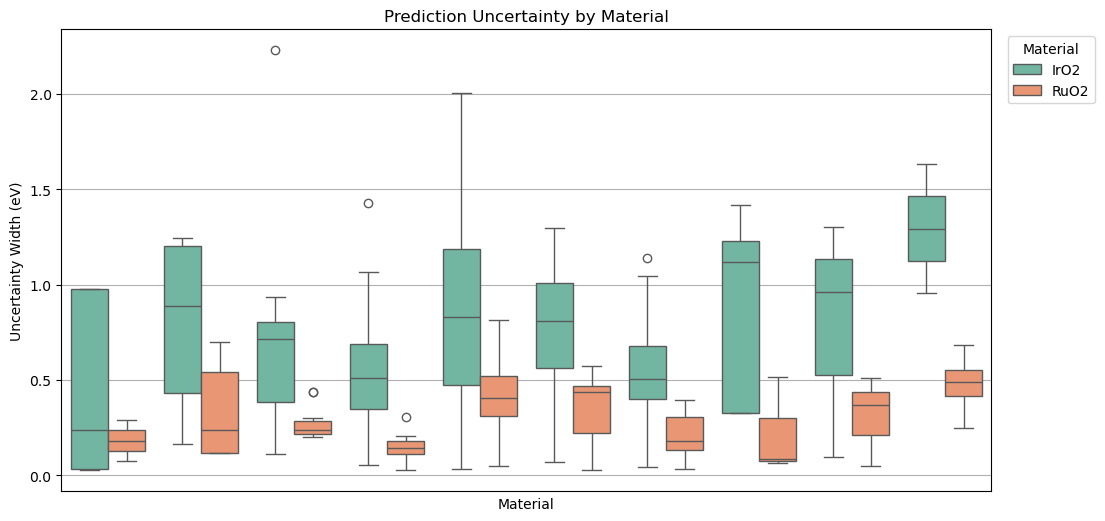

In [37]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_uq, x='molecule_group', y='uncertainty_width', hue='material', palette="Set2", legend=True)

plt.xlabel('Material')
plt.ylabel('Uncertainty Width (eV)')
plt.title('Prediction Uncertainty by Material')
#plt.xticks(rotation=45)
plt.xticks([])
plt.legend(title="Material", bbox_to_anchor=(1.01, 1), loc='upper left')
plt.grid(True)
plt.show()


In [43]:
df_uq.groupby('material')['y_std'].mean()

material
IrO2    0.670989
RuO2    0.261083
Name: y_std, dtype: float64

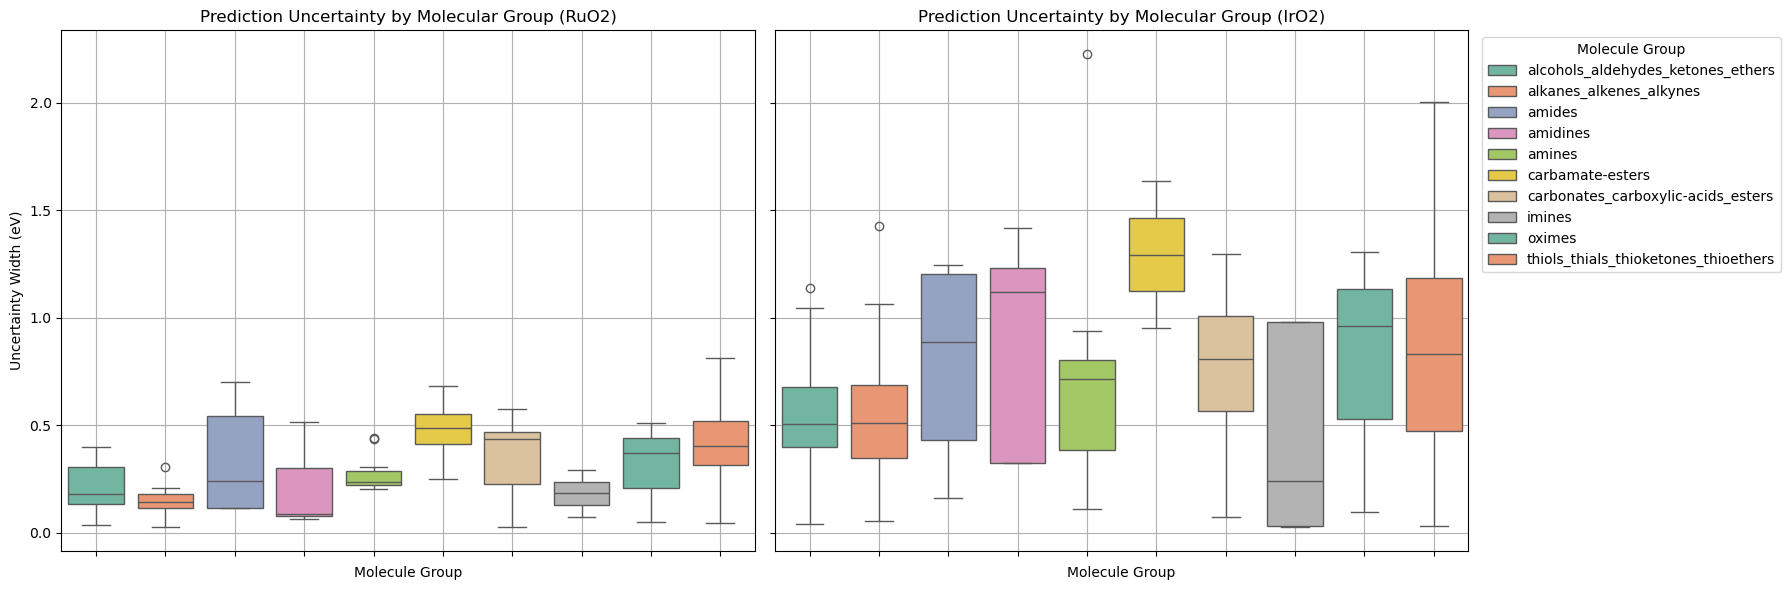

In [71]:
# Filter per material
df_ir = df_uq[df_uq['material'] == 'IrO2'].sort_values('molecule_group')
df_ru = df_uq[df_uq['material'] == 'RuO2'].sort_values('molecule_group')

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)  # 1 row, 2 columns

# RuO2 plot
sns.boxplot(data=df_ru, x='molecule_group', y='uncertainty_width', hue='molecule_group', palette='Set2', legend=False, ax=axes[0]
)
axes[0].set_title("Prediction Uncertainty by Molecular Group (RuO2)")
axes[0].set_xlabel("Molecule Group")
axes[0].set_ylabel("Uncertainty Width (eV)")
axes[0].set_xticklabels([])
axes[0].grid(True)


# IrO2 plot
sns.boxplot(data=df_ir, x='molecule_group', y='uncertainty_width', hue='molecule_group', palette='Set2', legend=True, ax=axes[1])
axes[1].set_title("Prediction Uncertainty by Molecular Group (IrO2)")
axes[1].set_xlabel("Molecule Group")
axes[1].set_ylabel("Uncertainty Width (eV)")
axes[1].set_xticklabels([])
axes[1].grid(True)
axes[1].legend(title='Molecule Group', bbox_to_anchor=(1.01, 1), loc='upper left')



plt.tight_layout()
plt.show()
